# **Course : Project's in machine learning**

## **Sprint #1**

### **Group 6 Team Members:**

<div style="display: flex; flex-wrap: wrap; gap: 10px;">
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Syed Riyaz Ahamed, Syed Muzammil</h4>
        <p><h4>ID: 9012161<h4></p>
    </div>
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Mathew, George</h4>
        <p><h4>ID: 8966959<h4></p>
        </div>
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Marolia, Tejaswini</h4>
        <p><h4>ID: 8944151<h4></p>
        </div>
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Lella Gopal, Samyukth Lalith</h4>
        <p><h4>ID: 9005574<h4></p>
        </div>
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Kombarakaran Antony Babu, Ashley Sherry</h4>
        <p><h4>ID: 5649<h4></p>
    </div>
    <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; width: 200px;">
        <h4>Garrity, Nathan</h4>
        <p><h4>ID: 7594<h4></p>
    </div>
</div>

==========================================================================================================================================================================

### **Project Name : AI Powered Diabetic Retinopathy**

#### **Problem statement:**<br>
**DR is one of the major causes of visual impairment among diabetic patients worldwide. The complications are grave, but early detection and treatment can prevent them; however, accessing specialized eye care is limited in many parts of the world, especially in remote and under-resourced regions. Traditional diagnosis methods are cumbersome, expensive, and dependent on specialists, delaying diagnosis and thus treatment.**<br>

#### **Problem strategy:**<br>
**This strategy emphasizes using CNNs for addressing the major requirement for DR accurate diagnosis in a friendly and accessible way. With AI techniques being applied in scalable platforms, the project can be an initiative towards transformation of eye care in less-endowed parts and advance boundaries for AI research as well.**<br>

#### **Project Purpose:**<br>
- **Detect DR accurately from fundus images. (internal images)**
- **Provide early intervention opportunities to prevent blindness.** 
- **Enhance healthcare accessibility by minimizing dependency on specialists.** 
- **Improve diagnostic efficiency for clinicians with multi-condition assessments.** 

#### **Project Vision :**<br>
**To revolutionize diabetic retinopathy diagnosis and eye health assessment by creating an accessible, accurate, and scalable AI-powered solution, reducing preventable blindness globally.**<br>

#### **Project Mission  :**<br>
**Design and deploy an AI-based system that uses CNNs to offer early and accurate DR detection, personalized progression monitoring, and comprehensive eye health analysis, all to ensure equitable healthcare for all, especially for the underserved.**<br>

In [6]:
# Data Handling
import pandas as pd
import numpy as np
import os
import shutil

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Deep Learning & Model Training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Sklearn for Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### **Code to Load csv file**

In [7]:
import pandas as pd

# Load the CSV file
csv_path = "train.csv"
df = pd.read_csv(csv_path)

In [8]:
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


#### **Code to upload the images**

In [9]:
import os

# Path to the image folder
image_dir = "colored_images"

# Check if folder exists
if os.path.exists(image_dir):
    print(f"'{image_dir}' folder found!")
    
    # Print number of images per class
    class_counts = {cls: len(os.listdir(os.path.join(image_dir, cls))) for cls in os.listdir(image_dir)}
    print("Number of images in each class:", class_counts)
    
    # Display some sample file names
    for cls in os.listdir(image_dir):
        sample_images = os.listdir(os.path.join(image_dir, cls))[:5]  # Get 5 samples
        print(f"\nSample images from {cls}: {sample_images}")

else:
    print(f"'{image_dir}' folder NOT found! Check the path.")

'colored_images' folder found!
Number of images in each class: {'Mild': 346, 'Moderate': 886, 'No_DR': 1638, 'Proliferate_DR': 267, 'Severe': 171}

Sample images from Mild: ['0024cdab0c1e.png', '00cb6555d108.png', '0124dffecf29.png', '01b3aed3ed4c.png', '0369f3efe69b.png']

Sample images from Moderate: ['000c1434d8d7.png', '00a8624548a9.png', '00e4ddff966a.png', '012a242ac6ff.png', '0161338f53cc.png']

Sample images from No_DR: ['002c21358ce6.png', '00cc2b75cddd.png', '00f6c1be5a33.png', '0125fbd2e791.png', '014508ccb9cb.png']

Sample images from Proliferate_DR: ['001639a390f0.png', '0083ee8054ee.png', '0243404e8a00.png', '02685f13cefd.png', '0318598cfd16.png']

Sample images from Severe: ['0104b032c141.png', '03c85870824c.png', '042470a92154.png', '05cd0178ccfe.png', '069f43616fab.png']


## **Exploratory Data Analysis (EDA)**

#### **Checking Dataset Information**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


#### **Checking for Missing Values**

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Dataset:\n", missing_values)

Missing Values in Dataset:
 id_code      0
diagnosis    0
dtype: int64


#### **Checking Class Distribution**

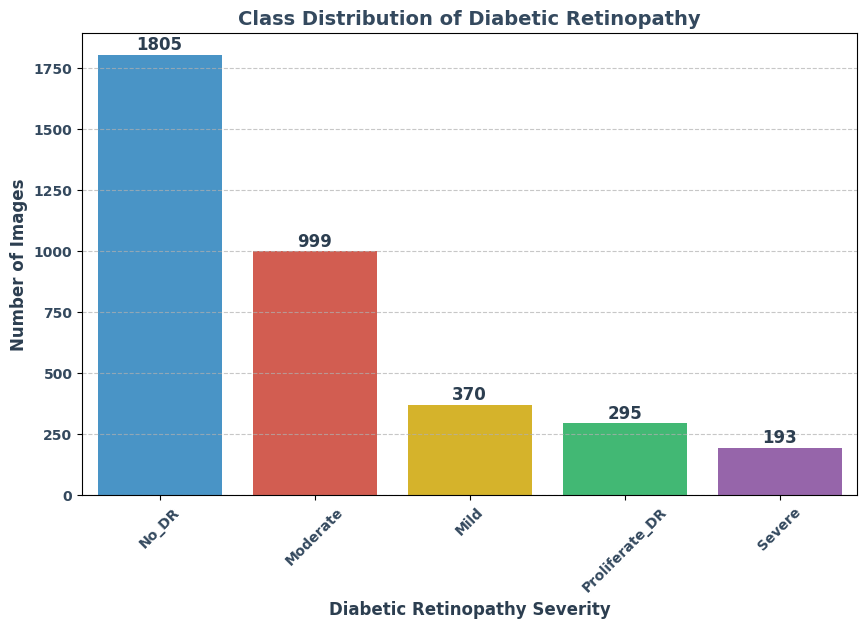

In [12]:
# Reload the CSV file
import pandas as pd

# Load the CSV file
file_path = "train.csv"
df = pd.read_csv(file_path)

# Map diagnosis labels to class names
class_labels = {0: "No_DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferate_DR"}
df["diagnosis"] = df["diagnosis"].map(class_labels)

# Generate unique design for Class Distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
colors = ["#3498db", "#e74c3c", "#f1c40f", "#2ecc71", "#9b59b6"]
sns.barplot(x=df["diagnosis"].value_counts().index, 
            y=df["diagnosis"].value_counts().values, 
            palette=colors)

# Enhancing aesthetics
plt.title("Class Distribution of Diabetic Retinopathy", fontsize=14, fontweight='bold', color='#34495e')
plt.xlabel("Diabetic Retinopathy Severity", fontsize=12, fontweight='bold', color='#2c3e50')
plt.ylabel("Number of Images", fontsize=12, fontweight='bold', color='#2c3e50')
plt.xticks(rotation=45, fontsize=10, fontweight='bold', color='#34495e')
plt.yticks(fontsize=10, fontweight='bold', color='#34495e')

# Adding value labels on top of bars
for i, value in enumerate(df["diagnosis"].value_counts().values):
    plt.text(i, value + 20, str(value), ha='center', fontsize=12, fontweight='bold', color='#2c3e50')

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

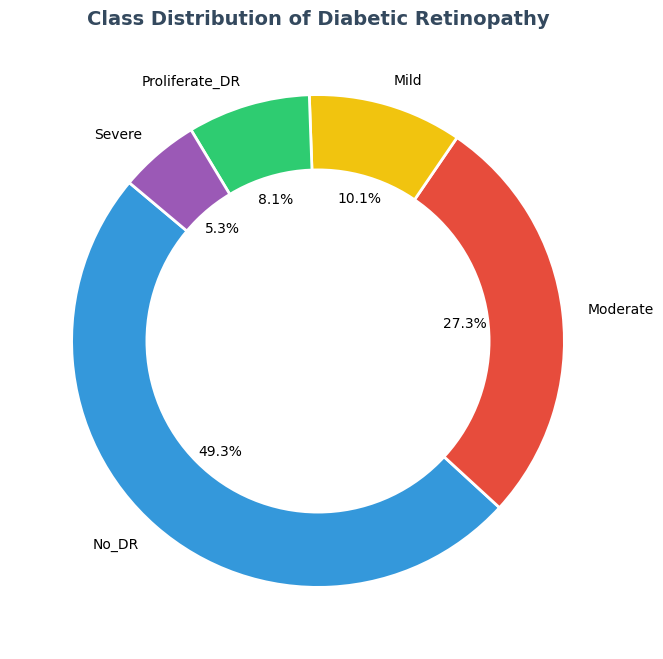

In [13]:
# Donut Chart for Class Distribution
plt.figure(figsize=(8, 8))
colors = ["#3498db", "#e74c3c", "#f1c40f", "#2ecc71", "#9b59b6"]
class_counts = df["diagnosis"].value_counts()

# Create pie chart with a donut shape
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=colors,
        startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Draw a white circle at the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Title and display
plt.title("Class Distribution of Diabetic Retinopathy", fontsize=14, fontweight='bold', color='#34495e')
plt.show()

#### **Displaying Sample Images from Each Class**

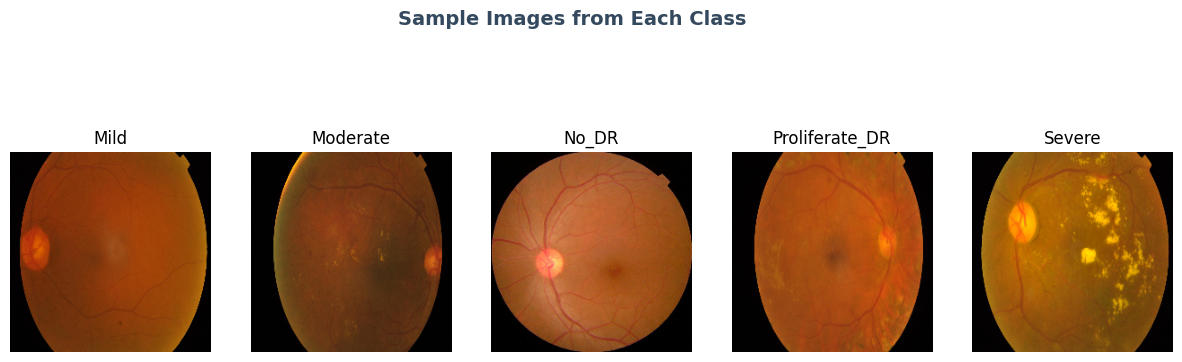

In [14]:
import os
import cv2
import numpy as np
from PIL import Image

# Function to display sample images from each class
def display_sample_images(image_dir):
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    fig.suptitle("Sample Images from Each Class", fontsize=14,fontweight='bold', color='#34495e')

    class_folders = os.listdir(image_dir)
    
    for i, cls in enumerate(class_folders):
        class_path = os.path.join(image_dir, cls)
        sample_image = os.listdir(class_path)[0]  # Get first image in folder
        img_path = os.path.join(class_path, sample_image)

        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(cls)
        axes[i].axis("off")

    plt.show()

# Call function
display_sample_images("colored_images")

#### **Checking Image Sizes and Aspect Ratios**

In [15]:
# Check image sizes
image_sizes = []

for cls in os.listdir("colored_images"):
    class_path = os.path.join("colored_images", cls)
    sample_image = os.listdir(class_path)[0]  # Get first image in folder
    img_path = os.path.join(class_path, sample_image)

    img = Image.open(img_path)
    image_sizes.append(img.size)

# Display unique image sizes
unique_sizes = set(image_sizes)
print("Unique Image Sizes:", unique_sizes)

Unique Image Sizes: {(224, 224)}


#### **pixel intensity distribution**

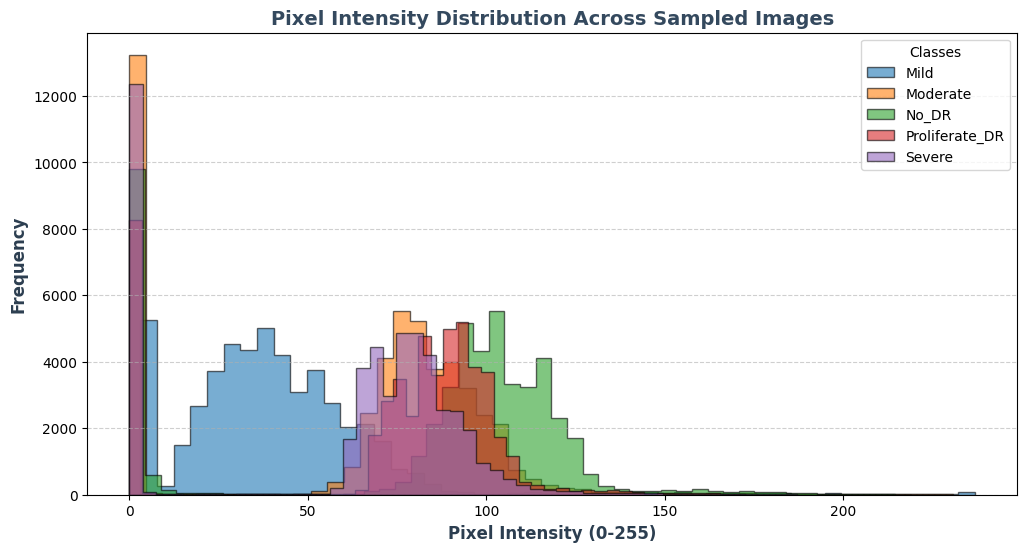

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Function to plot pixel intensity distribution
def plot_pixel_intensity(image_dir, num_samples=5):
    plt.figure(figsize=(12, 6))

    # Get random images from different classes
    class_folders = os.listdir(image_dir)
    sampled_images = []

    for cls in class_folders:
        class_path = os.path.join(image_dir, cls)
        images = os.listdir(class_path)
        if images:
            img_path = os.path.join(class_path, random.choice(images))
            sampled_images.append((cls, img_path))

    # Plot histogram for each sampled image
    for i, (cls, img_path) in enumerate(sampled_images[:num_samples]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = img.flatten()  # Flatten image to 1D array

        plt.hist(img, bins=50, alpha=0.6, label=cls, histtype='stepfilled', edgecolor='black')

    # Aesthetic improvements
    plt.title("Pixel Intensity Distribution Across Sampled Images", fontsize=14, fontweight='bold', color='#34495e')
    plt.xlabel("Pixel Intensity (0-255)", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.ylabel("Frequency", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.legend(title="Classes", fontsize=10, loc="upper right")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Display plot
    plt.show()

# Call function to plot pixel intensity distribution
plot_pixel_intensity("colored_images")

#### **Checking Image Brightness Distribution**

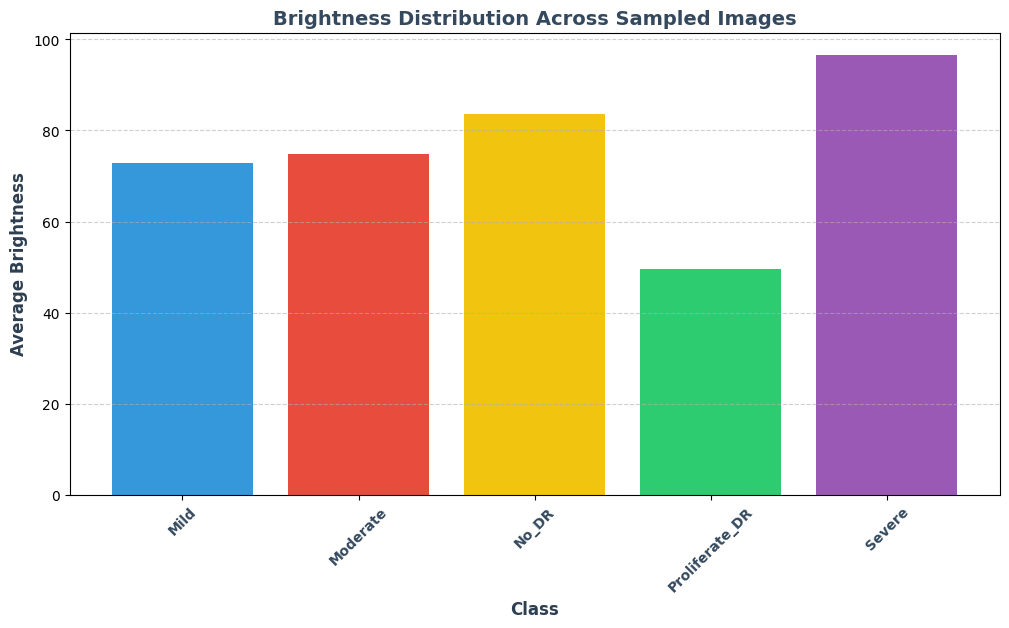

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Function to calculate and plot brightness distribution
def plot_brightness_distribution(image_dir, num_samples=5):
    plt.figure(figsize=(12, 6))

    class_folders = os.listdir(image_dir)
    sampled_images = []

    for cls in class_folders:
        class_path = os.path.join(image_dir, cls)
        images = os.listdir(class_path)
        if images:
            img_path = os.path.join(class_path, random.choice(images))
            sampled_images.append((cls, img_path))

    # Compute brightness for each sampled image
    brightness_values = []
    class_labels = []

    for cls, img_path in sampled_images[:num_samples]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        brightness = np.mean(img)  # Compute mean brightness
        brightness_values.append(brightness)
        class_labels.append(cls)

    # Plot brightness distribution
    plt.bar(class_labels, brightness_values, color=['#3498db', '#e74c3c', '#f1c40f', '#2ecc71', '#9b59b6'])
    plt.xlabel("Class", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.ylabel("Average Brightness", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.title("Brightness Distribution Across Sampled Images", fontsize=14, fontweight='bold', color='#34495e')
    plt.xticks(rotation=45, fontsize=10, fontweight='bold', color='#34495e')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

# Call function to plot brightness distribution
plot_brightness_distribution("colored_images")

#### **Checking Image Sharpness (Blur Detection)**

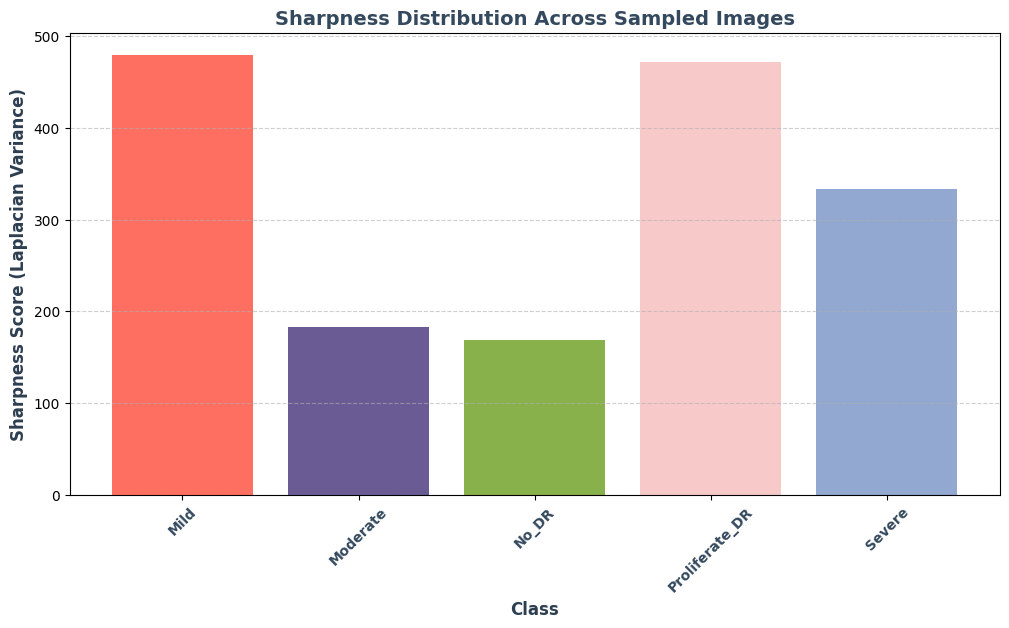

In [18]:
# Function to calculate and plot sharpness distribution
def plot_sharpness_distribution(image_dir, num_samples=5):
    plt.figure(figsize=(12, 6))

    class_folders = os.listdir(image_dir)
    sampled_images = []

    for cls in class_folders:
        class_path = os.path.join(image_dir, cls)
        images = os.listdir(class_path)
        if images:
            img_path = os.path.join(class_path, random.choice(images))
            sampled_images.append((cls, img_path))

    # Compute sharpness (Laplacian variance) for each image
    sharpness_values = []
    class_labels = []

    for cls, img_path in sampled_images[:num_samples]:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        sharpness = cv2.Laplacian(img, cv2.CV_64F).var()  # Laplacian variance
        sharpness_values.append(sharpness)
        class_labels.append(cls)

    # Plot sharpness distribution
    plt.bar(class_labels, sharpness_values, color=['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9', '#92a8d1'])
    plt.xlabel("Class", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.ylabel("Sharpness Score (Laplacian Variance)", fontsize=12, fontweight='bold', color='#2c3e50')
    plt.title("Sharpness Distribution Across Sampled Images", fontsize=14, fontweight='bold', color='#34495e')
    plt.xticks(rotation=45, fontsize=10, fontweight='bold', color='#34495e')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.show()

# Call function to plot sharpness distribution
plot_sharpness_distribution("colored_images")

## **Data Preprocessing & Augmentation**

#### **Organizing Image Paths**

In [19]:
import os
import pandas as pd

# Load CSV
df = pd.read_csv("train.csv")

# Define image directory path
image_dir = "colored_images"

# Mapping class labels to folder names
class_labels = {0: "No_DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferate_DR"}

# Creating a new column with the full image path
df["image_path"] = df.apply(lambda row: os.path.join(image_dir, class_labels[row["diagnosis"]], row["id_code"] + ".png"), axis=1)

# Save updated CSV with image paths
df.to_csv("train_with_paths.csv", index=False)

print("Image paths organized and saved to train_with_paths.csv!")

Image paths organized and saved to train_with_paths.csv!


#### **Resizing Images**

In [20]:
import cv2

# Function to resize images
def resize_images(image_dir, target_size=(224, 224)):
    for cls in os.listdir(image_dir):
        class_path = os.path.join(image_dir, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            resized_img = cv2.resize(img, target_size)  # Resize to 224x224
            cv2.imwrite(img_path, resized_img)  # Overwrite image with resized version

# Call function to resize images
resize_images("colored_images")

print("All images resized to 224x224!")

All images resized to 224x224!


#### **Normalization**

In [21]:
import numpy as np

# Function to normalize image pixels to [0,1]
def normalize_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = img.astype(np.float32) / 255.0  # Scale pixel values
    return img

print("Pixel values normalized to range [0,1]!")

Pixel values normalized to range [0,1]!


#### **Data Augmentation**

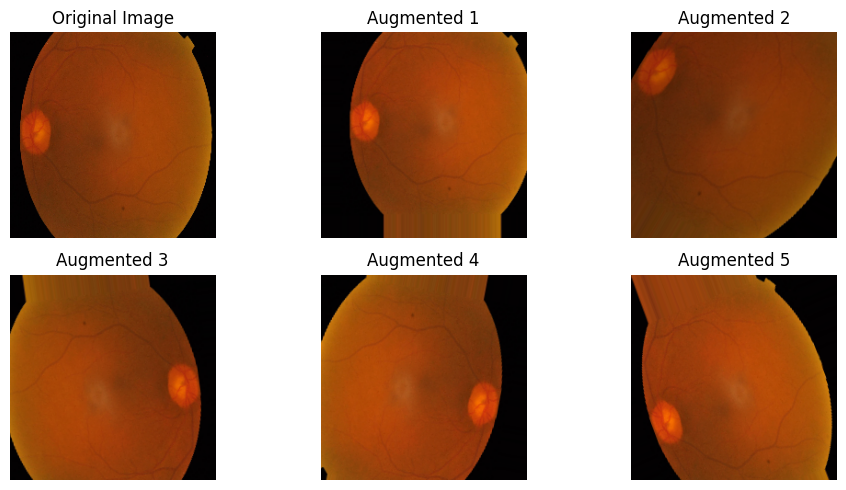

In [22]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation transformations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    rescale=1.0/255.0  # Normalize
)

# Load a sample image
sample_img_path = "colored_images/Mild/0024cdab0c1e.png"  # Update with an existing image path
img = cv2.imread(sample_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (224, 224))  # Resize to match model input

# Convert image to array and expand dimensions
img_array = np.expand_dims(img, axis=0)

# Generate augmented images
aug_iter = datagen.flow(img_array, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

# Generate and show 5 augmented images
for i in range(2, 7):
    augmented_img = next(aug_iter)[0]
    plt.subplot(2, 3, i)
    plt.imshow(augmented_img)
    plt.title(f"Augmented {i-1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### **Train-Test-Validation Split**

In [23]:
# Splitting dataset into train, validation, and test sets
train_df, test_val_df = train_test_split(df, test_size=0.2, stratify=df["diagnosis"], random_state=42)
val_df, test_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df["diagnosis"], random_state=42)

# Save CSV files
train_df.to_csv("train_split.csv", index=False)
val_df.to_csv("val_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)

#### **Adaptive Histogram Equalization (AHE)**

In [24]:
def apply_clahe(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(img)

#### **Image Cleaning (Remove Blurry Images)**

In [25]:
def remove_blurry_images(image_dir, threshold=100):
    removed_images = []

    for cls in os.listdir(image_dir):
        class_path = os.path.join(image_dir, cls)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()

            if laplacian_var < threshold:
                os.remove(img_path)  # Remove blurry image
                removed_images.append(img_path)

    print(f"Removed {len(removed_images)} blurry images.")

# Call function
remove_blurry_images("colored_images", threshold=100)

Removed 0 blurry images.


#### **Convert Images to Tensors for Faster Loading**

In [26]:
import tensorflow as tf
import pathlib

# Convert Image Folder to TensorFlow Dataset
data_dir = pathlib.Path("colored_images")
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=32,
    label_mode="int"
)

Found 3308 files belonging to 5 classes.


## **Building the CNN model**

#### **Importing the libraries**

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.activations import swish

#### **Load Data Using ImageDataGenerator**

In [28]:
import pandas as pd

# Load CSV files
train_df = pd.read_csv("train_split.csv")
val_df = pd.read_csv("val_split.csv")
test_df = pd.read_csv("test_split.csv")

# Convert numerical labels to string format (required for categorical mode)
label_mapping = {0: "No_DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferate_DR"}
train_df["diagnosis"] = train_df["diagnosis"].map(label_mapping)
val_df["diagnosis"] = val_df["diagnosis"].map(label_mapping)
test_df["diagnosis"] = test_df["diagnosis"].map(label_mapping)

# Save updated CSV files
train_df.to_csv("train_split_fixed.csv", index=False)
val_df.to_csv("val_split_fixed.csv", index=False)
test_df.to_csv("test_split_fixed.csv", index=False)

In [29]:
# Define paths
train_dir = "train_split_fixed.csv"
val_dir = "val_split_fixed.csv"
test_dir = "test_split_fixed.csv"

# Data augmentation & normalization
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixels
    rotation_range=30, width_shift_range=0.1, height_shift_range=0.1,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True,
    validation_split=0.2  # Split into train & validation
)

# Load train dataset
train_generator = datagen.flow_from_dataframe(
    pd.read_csv(train_dir), x_col="image_path", y_col="diagnosis",
    target_size=(224, 224), batch_size=32, class_mode="categorical", subset="training"
)

# Load validation dataset
val_generator = datagen.flow_from_dataframe(
    pd.read_csv(val_dir), x_col="image_path", y_col="diagnosis",
    target_size=(224, 224), batch_size=32, class_mode="categorical", subset="validation"
)

# Load test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    pd.read_csv(test_dir), x_col="image_path", y_col="diagnosis",
    target_size=(224, 224), batch_size=32, class_mode="categorical", shuffle=False
)


Found 2108 validated image filenames belonging to 5 classes.
Found 65 validated image filenames belonging to 5 classes.
Found 346 validated image filenames belonging to 5 classes.


#### **Define CNN Model Architecture**

In [40]:
# Build Improved CNN Model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Second Convolutional Block
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Third Convolutional Block
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Fourth Convolutional Block (Additional for depth)
    Conv2D(256, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Fifth Convolutional Block (Additional for depth)
    Conv2D(512, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Global Average Pooling instead of Flattening
    GlobalAveragePooling2D(),
    
    # Fully Connected Layers
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),  # Increased dropout for regularization
    
    Dense(5, activation='softmax')  # Output layer (5 classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Better Training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,837,765 (7.01 MB)

 Trainable params: 1,835,781 (7.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

#### **Train the Model**

In [42]:
# Train the Multi-Output Model
history = model.fit(
    train_generator,  # Custom generator returning multi-output labels
    validation_data=val_generator,  # Custom validation generator
    epochs=50,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 834ms/step - accuracy: 0.5950 - loss: 2.3219 - val_accuracy: 0.0923 - val_loss: 3.0186 - learning_rate: 1.0000e-04
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 59s 859ms/step - accuracy: 0.6500 - loss: 2.1502 - val_accuracy: 0.0923 - val_loss: 2.6897 - learning_rate: 1.0000e-04
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 58s 849ms/step - accuracy: 0.6769 - loss: 2.0485 - val_accuracy: 0.3692 - val_loss: 2.6011 - learning_rate: 1.0000e-04
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 57s 836ms/step - accuracy: 0.6830 - loss: 2.0101 - val_accuracy: 0.2615 - val_loss: 2.7248 - learning_rate: 1.0000e-04
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 66s 979ms/step - accuracy: 0.7028 - loss: 1.9546 - val_accuracy: 0.3077 - val_loss: 2.8433 - learning_rate: 1.0000e-04
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.6789 - loss: 1.9822
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
66/66 ━━━━━━━━━━━━━━━━━━━━ 63s 914ms/step - accuracy:

#### **Evaluate Model Performance**

In [43]:
# Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.7608 - loss: 1.7572
Test Accuracy: 75.14%


#### **Plot Accuracy & Loss Curve**

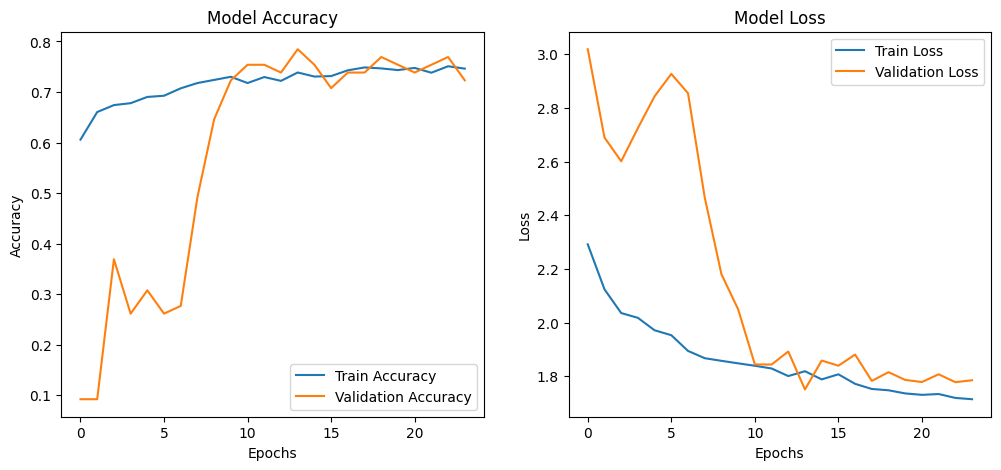

In [44]:
# Plot Training History
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### **Confusion Matrix**

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step


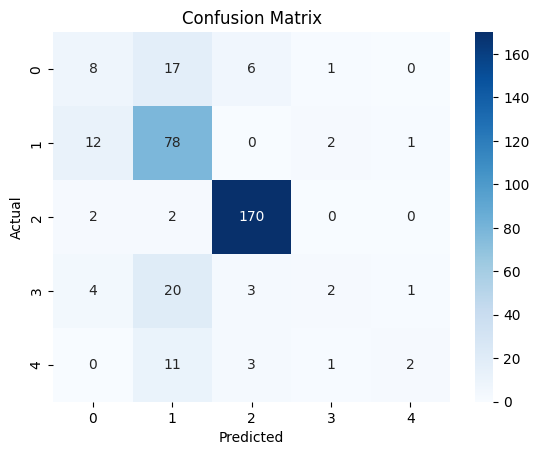

In [45]:
# Generate Predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### **ROC Curve for Each Class**

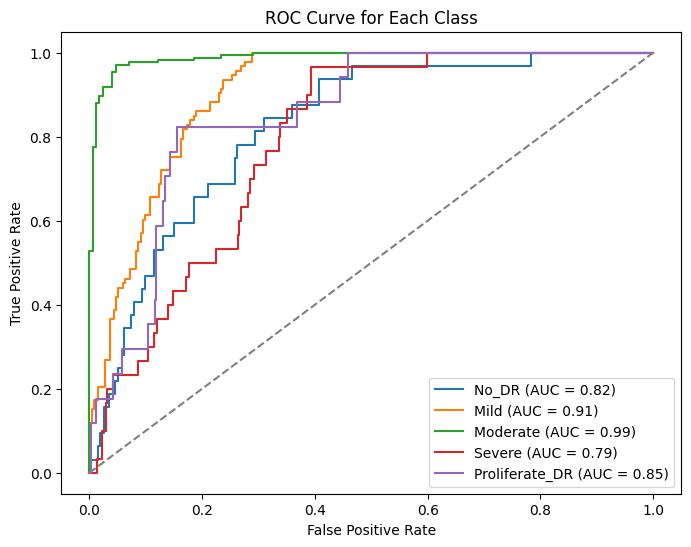

In [46]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define class names
class_labels = ["No_DR", "Mild", "Moderate", "Severe", "Proliferate_DR"]

# Convert labels to one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=[0,1,2,3,4])
n_classes = y_true_one_hot.shape[1]

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend()
plt.show()

In [47]:
model.save('diabetic_retinopathy_model.h5')

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the trained model
model_path = "diabetic_retinopathy_model.h5"
model = tf.keras.models.load_model(model_path)

# Function to preprocess the image for prediction
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

# Function to generate AI-based insights based on Disease Progression
def generate_insights(prediction):
    """
    Uses Disease Progression as the central factor to determine all insights.
    Applies confidence thresholds to prevent false positives.
    """
    severity_levels = ["No DR", "Mild", "Moderate", "Severe", "Proliferative"]

    # Ensure predictions have the expected shape (5,)
    if prediction.shape != (5,):
        return {"error": f"Invalid prediction format. Expected (5,), but got {prediction.shape}"}

    # Find max probability and its corresponding severity
    max_index = np.argmax(prediction)
    max_confidence = prediction[max_index] * 100
    progression_level = severity_levels[max_index]

    # Apply stricter thresholding to avoid false positives
    if max_confidence < 50:  # If confidence is below 50%, classify as "No DR"
        progression_level = "No DR"

    insights = {
        "risk_assessment": (
            f"📌 **Patient Risk Assessment**\n"
            f"   - **Severity Level:** {progression_level}\n"
            f"   - **Confidence Score:** {max_confidence:.2f}%\n"
            f"   - **Analysis:** The AI suggests a {progression_level} risk level for diabetic retinopathy."
        ),
        "early_detection": (
            f"📌 **Early Detection & Screening**\n"
            f"   - **Detection Level:** {progression_level}\n"
            f"   - **Confidence Score:** {max_confidence:.2f}%\n"
            f"   - **Analysis:** Signs of DR are classified as {progression_level} based on AI predictions."
        ),
        "predictive_analysis": (
            f"📌 **Predictive Analysis & Preventive Actions**\n"
            f"   - **Disease Progression:** {progression_level}\n"
            f"   - **Confidence Score:** {max_confidence:.2f}%\n"
            f"   - **Analysis:** The AI predicts a {progression_level} likelihood of DR progression."
        ),
        "alerts_followups": (
            f"📌 **Alerts & Follow-ups**\n"
            f"   - **Follow-up Requirement:** {progression_level}\n"
            f"   - **Confidence Score:** {max_confidence:.2f}%\n"
            f"   - **Recommendation:** The AI suggests {progression_level} level of follow-up care."
        ),
        "educational_insights": (
            f"📌 **Educational Insights for Patients**\n"
            f"   - **Patient Education Level:** {progression_level}\n"
            f"   - **Confidence Score:** {max_confidence:.2f}%\n"
            f"   - **Guidance:** Educational awareness and intervention are advised at a {progression_level} level."
        )
    }
    return insights

# Function to get model predictions and generate structured report insights
def get_model_predictions(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)

    # Debugging: Print raw prediction output
    print("🔍 Raw model prediction:", prediction)
    print("🔍 Prediction shape:", prediction.shape)
    print(f"🔹 No DR: {prediction[0][0] * 100:.2f}%")
    print(f"🔹 Mild DR: {prediction[0][1] * 100:.2f}%")
    print(f"🔹 Moderate DR: {prediction[0][2] * 100:.2f}%")
    print(f"🔹 Severe DR: {prediction[0][3] * 100:.2f}%")
    print(f"🔹 Proliferative DR: {prediction[0][4] * 100:.2f}%")

    # Ensure predictions are correctly indexed
    if len(prediction.shape) == 2:  # (batch_size, num_classes)
        prediction = prediction[0]

    insights = generate_insights(prediction)
    return insights

# Example usage (Replace with actual retina image path)
test_image_path = "colored_images/Severe/f6f433f3306f.png"  # Placeholder image
insights = get_model_predictions(test_image_path)

# Print insights to verify correctness
for key, value in insights.items():
    print(value, "\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
🔍 Raw model prediction: [[0.00969777 0.5693015  0.00094305 0.03729333 0.38276443]]
🔍 Prediction shape: (1, 5)
🔹 No DR: 0.97%
🔹 Mild DR: 56.93%
🔹 Moderate DR: 0.09%
🔹 Severe DR: 3.73%
🔹 Proliferative DR: 38.28%
📌 **Patient Risk Assessment**
   - **Severity Level:** Mild
   - **Confidence Score:** 56.93%
   - **Analysis:** The AI suggests a Mild risk level for diabetic retinopathy. 

📌 **Early Detection & Screening**
   - **Detection Level:** Mild
   - **Confidence Score:** 56.93%
   - **Analysis:** Signs of DR are classified as Mild based on AI predictions. 

📌 **Predictive Analysis & Preventive Actions**
   - **Disease Progression:** Mild
   - **Confidence Score:** 56.93%
   - **Analysis:** The AI predicts a Mild likelihood of DR progression. 

📌 **Alerts & Follow-ups**
   - **Follow-up Requirement:** Mild
   - **Confidence Score:** 56.93%
   - **Recommendation:** The AI suggests Mild level of follow-up care. 

📌 **Educational Insights for Patient